In [3]:
import torch
import numpy as np
import sys; sys.path.append('../src/'); sys.path.append('..')
import matplotlib.pyplot as plt

In [4]:
from src.model.utils.metrics import l2_loss, explained_reconstruction, mean_correlation, importance_correlation, main_exprec
from src.toy_experiment import MLP, Adam, generate_configs, read_dataset, DataLoader, VolumeAE
from itertools import product

In [118]:
ll = [1, 2, 4, 8, 16, 32][:4]
dd = [2, 4, 8, 16, 32]
ii = range(5)
lams = 10 ** np.linspace(-6, 0, 13)
ww = [[32]*4, [48]*4, [64]*4, [96]*4, [128]*4, [256]*4][:4]

mes = torch.zeros(len(ll), len(dd), len(lams)); recs = torch.zeros(len(ll), len(dd), len(lams))
for o, (l, width) in enumerate(zip(ll, ww)):
    for p, d in enumerate(dd):
        for q, lam in enumerate(lams):
            me = []; rec = []
            for i in ii:
                dataset = read_dataset(l, d*l, i)[:]
                configs = generate_configs(d*l, width, 'vol')

                ae = VolumeAE(configs, MLP, MLP, Adam)
                ae.load('../saves/toy/{}-man/{}-amb/#{}/{:.0e}/vol20000.tar'.format(l, l*d, i, lam))
                ae.eval()
                
                _me, _rec = main_exprec(ae.encoder, ae.decoder, dataset[:], l2_loss, l)[0], \
                    l2_loss(ae.decode(ae.encode(dataset)), dataset)
                if not torch.isnan(_me + _rec):
                    me.append(_me); rec.append(_rec)
            
            mes[o,p,q] = torch.as_tensor(me).mean(); recs[o,p,q] = torch.as_tensor(rec).mean()
                # epr, ztd = explained_reconstruction(ae.encoder, ae.decoder, dataset[:], l2_loss)
                
                # print(epr, ztd, importance_correlation(ztd, epr))

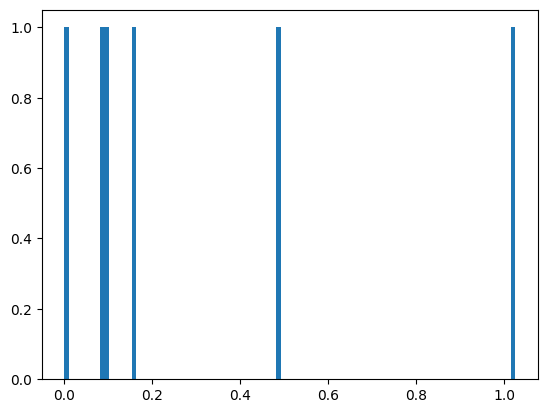

In [93]:
plt.hist(mes.clip(None, 20).min(-1)[0].flatten(), bins=100)
plt.show()

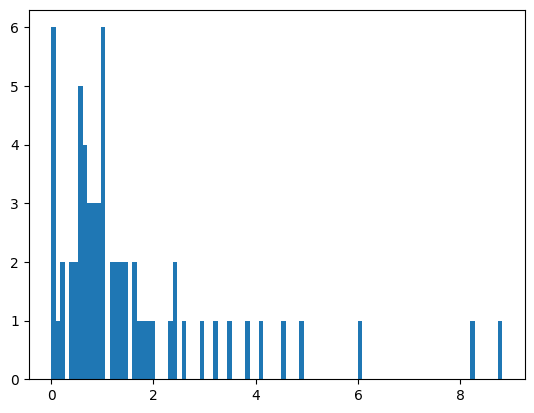

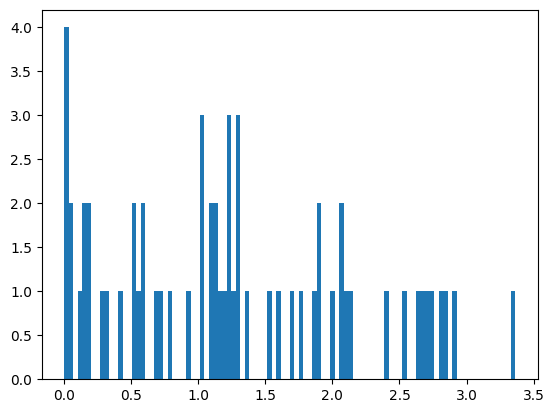

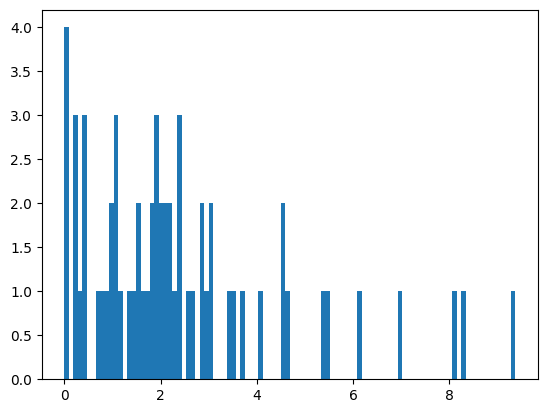

ValueError: supplied range of [0.0, inf] is not finite

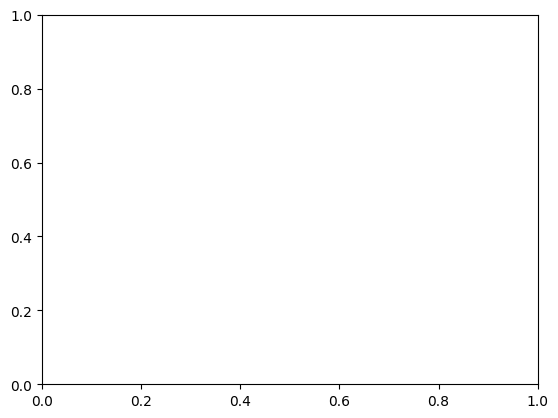

In [119]:
for each in mes:
    plt.hist(each.detach().flatten(), bins=100)
    plt.show()